In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv(r"/kaggle/input/used-car-information/Dataset.csv")

# Data Shaping

In [2]:
df.head(3)

,Unnamed: 0,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,...,new and less used,inv_car_price,inv_car_dist,inv_car_age,inv_brand,std_invprice,std_invdistance_travelled,std_invrank,best_buy1,best_buy2
0,0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,...,0,2.352941e-06,0.000103,0.200000,0.142857,0.143417,0.035730,0.132143,677.134239,0.0
1,1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai,...,0,3.076923e-06,0.000008,0.111111,0.090909,0.188859,0.002496,0.079545,37.501318,0.0
2,2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane,...,0,3.773585e-07,0.000015,0.250000,1.000000,0.019416,0.004978,1.000000,96.646020,0.0


In [3]:
df.columns

Index(['Unnamed: 0', 'Id', 'year', 'brand', 'full_model_name', 'model_name',
       'price', 'distance_travelled(kms)', 'fuel_type', 'city', 'brand_rank',
       'car_age', 'distance below 30k km', 'new and less used',
       'inv_car_price', 'inv_car_dist', 'inv_car_age', 'inv_brand',
       'std_invprice', 'std_invdistance_travelled', 'std_invrank', 'best_buy1',
       'best_buy2'],
      dtype='object')

In [4]:
df.isnull().sum()

Unnamed: 0                   0
Id                           0
year                         0
brand                        0
full_model_name              0
model_name                   0
price                        0
distance_travelled(kms)      0
fuel_type                    0
city                         0
brand_rank                   0
car_age                      0
distance below 30k km        0
new and less used            0
inv_car_price                0
inv_car_dist                 0
inv_car_age                  0
inv_brand                    0
std_invprice                 0
std_invdistance_travelled    0
std_invrank                  0
best_buy1                    0
best_buy2                    0
dtype: int64

In [5]:
df = df.drop(['Id','Unnamed: 0','inv_car_price','inv_car_dist','inv_car_age','inv_brand','std_invprice','std_invdistance_travelled','std_invrank','best_buy1','best_buy2'], axis=1)

In [6]:
df.shape

(1725, 12)

In [7]:
df.head(3)

,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age,distance below 30k km,new and less used
0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,7,5.0,1,0
1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai,11,9.0,0,0
2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane,1,4.0,0,0


In [8]:
model_name = df['model_name'].value_counts()
model_name

model_name
Creta      71
Innova     69
City       68
Swift      58
XUV500     46
           ..
Altroz      1
Civic       1
G-Class     1
MU-X        1
Jeep        1
Name: count, Length: 169, dtype: int64

In [9]:
model_less_than_10 = model_name[model_name<10]

In [10]:
def handle_model_name(x):
    if (x in model_less_than_10):
        return 'others' 
    else:
        return x

In [11]:
df['model_name'] = df['model_name'].apply(handle_model_name)

In [12]:
df['model_name'].value_counts()

model_name
others       425
Creta         71
Innova        69
City          68
Swift         58
XUV500        46
Elite         44
Grand         41
Verna         41
EcoSport      38
Ciaz          34
Baleno        32
i10           32
Polo          31
E-Class       31
i20           28
C-Class       28
Duster        25
Vitara        25
Q3            25
Endeavour     24
Jazz          24
3             24
Vento         23
Ertiga        23
Rapid         23
X1            22
Celerio       22
5             22
Alto          22
A6            21
Wagon         21
Evoque        20
Q7            20
Fortuner      18
7             17
Kwid          17
S-Class       16
Amaze         16
A4            15
Brio          14
CLA           13
WR-V          13
Corolla       12
F-Pace        11
XF            10
Compass       10
CR-V          10
Hector        10
XUV300        10
Nexon         10
Name: count, dtype: int64

In [13]:
fuel_type = df.fuel_type.value_counts()
fuel_type

fuel_type
Diesel        922
Petrol        788
CNG + 1         8
Petrol + 1      6
Hybrid          1
Name: count, dtype: int64

In [14]:
other_fuel_type = fuel_type[fuel_type < 10]

In [15]:
def handle_fuel_type(x):
    if (x in other_fuel_type):
        return 'others' 
    else:
        return x

In [16]:
df['fuel_type'] = df['fuel_type'].apply(handle_fuel_type)
df['fuel_type'].value_counts()

fuel_type
Diesel    922
Petrol    788
others     15
Name: count, dtype: int64

In [17]:
city = df['city'].value_counts()
city_less_than_40 = city[city<40]
def handle_city(x):
    if (x in city_less_than_40):
        return 'others' 
    else:
        return x
    
df['city'] = df['city'].apply(handle_city)
df['city'].value_counts()

city
Chennai      493
Bangalore    247
Pune         247
Hyderabad    245
Delhi        187
Mumbai       165
Dehradun      56
Thane         48
others        37
Name: count, dtype: int64

In [18]:
df = df.drop(['new and less used'], axis=1)

In [19]:
df.head(3)

,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age,distance below 30k km
0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,7,5.0,1
1,2012,Nissan,Nissan Sunny XV Diesel,others,325000.0,119120.0,Diesel,Mumbai,11,9.0,0
2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane,1,4.0,0


# Data Visualization

Text(0, 0.5, 'Frequency')

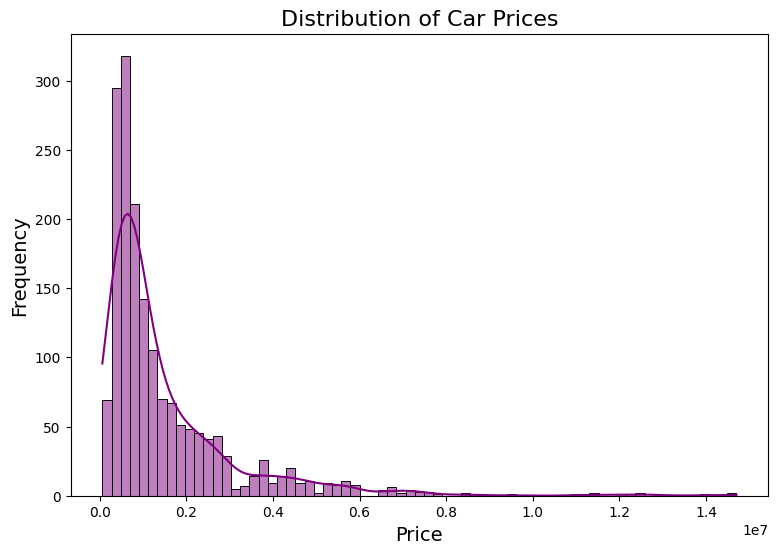

In [20]:
#distrubution of price
plt.figure(figsize=(9, 6))
sns.histplot(data = df['price'], kde=True, color='purple')
plt.title('Distribution of Car Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

Text(0, 0.5, 'price')

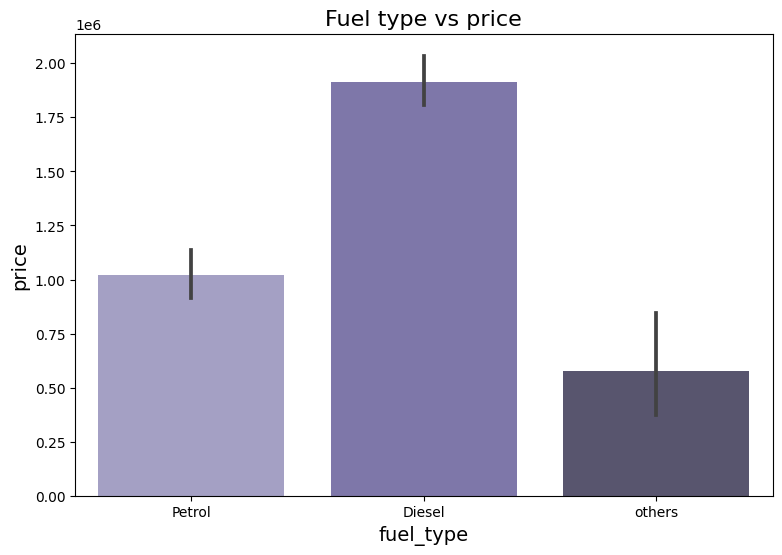

In [21]:
#fuel type vs price
plt.figure(figsize=(9, 6))
sns.barplot(data = df, x = df['fuel_type'], y = df['price'], palette='Purples_d')
plt.title('Fuel type vs price', fontsize=16)
plt.xlabel('fuel_type', fontsize=14)
plt.ylabel('price', fontsize=14)

Text(0, 0.5, 'Price')

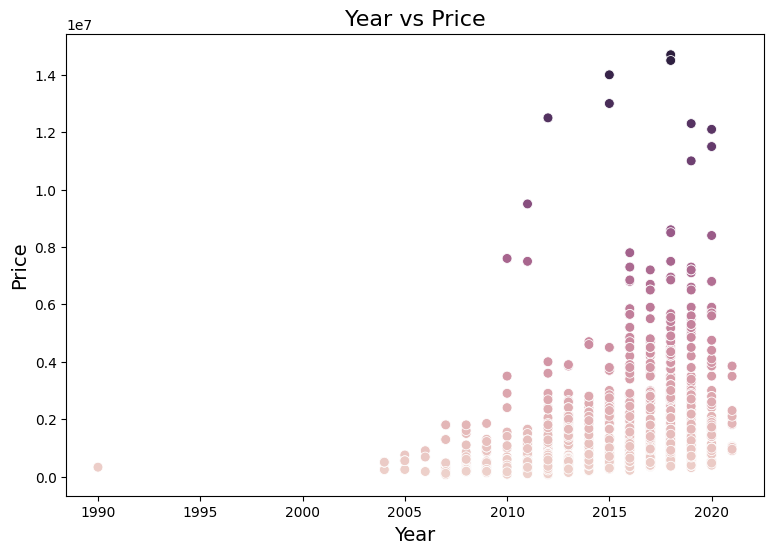

In [22]:
#year vs price relation
plt.figure(figsize=(9, 6))
sns.scatterplot(data = df, x = df['year'], y = df['price'], legend=False, hue=df['price'], s=50)
plt.title('Year vs Price', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)

Text(0, 0.5, 'Count')

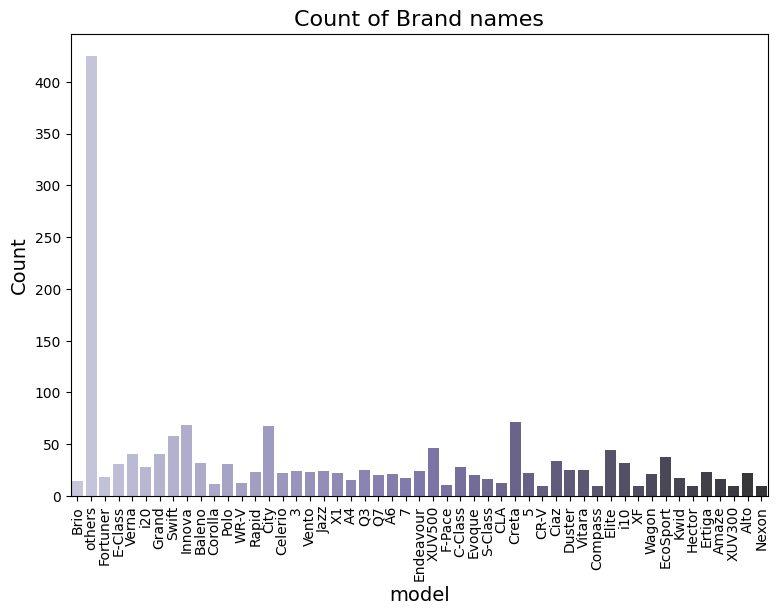

In [23]:
#count of brand names
plt.figure(figsize=(9, 6))
sns.countplot(data = df, x='model_name', palette='Purples_d')
plt.title('Count of Brand names', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('model', fontsize=14)
plt.ylabel('Count', fontsize=14)

Text(0, 0.5, 'price')

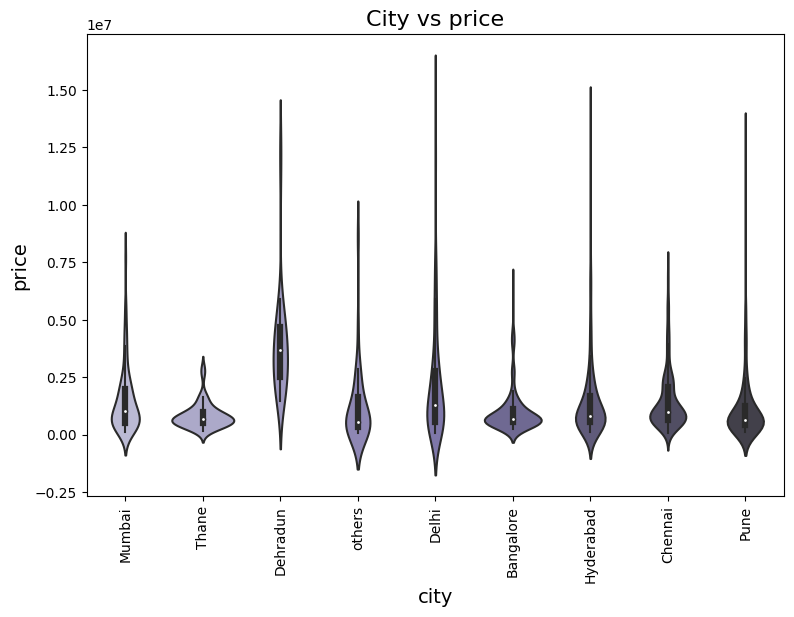

In [24]:
#city vs price
plt.figure(figsize=(9, 6))
sns.violinplot(data = df, x='city', y='price', palette = 'Purples_d')
plt.title('City vs price', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('city', fontsize=14)
plt.ylabel('price', fontsize=14)

Text(0, 0.5, 'Fuel Type')

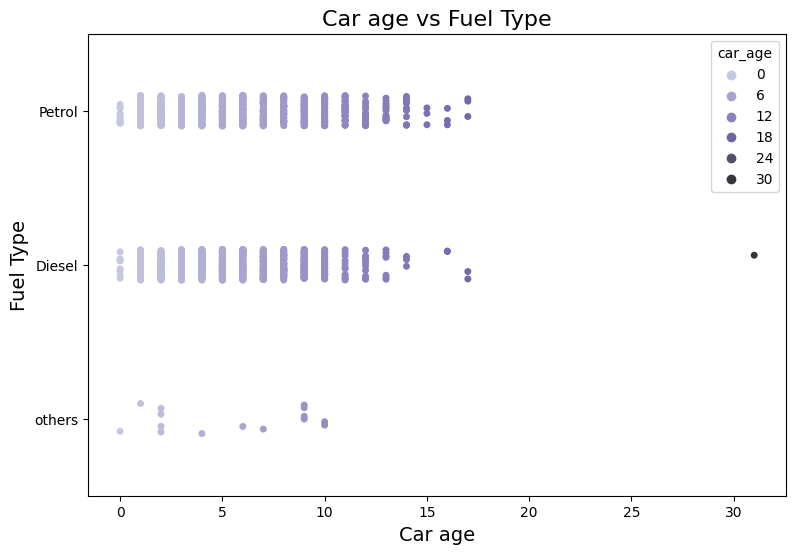

In [25]:
#Car age vs Fuel Type
plt.figure(figsize=(9, 6))
sns.stripplot(data = df, x='car_age', y='fuel_type', hue='car_age', palette='Purples_d')
plt.title('Car age vs Fuel Type', fontsize=16)
plt.xlabel('Car age', fontsize=14)
plt.ylabel('Fuel Type', fontsize=14)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


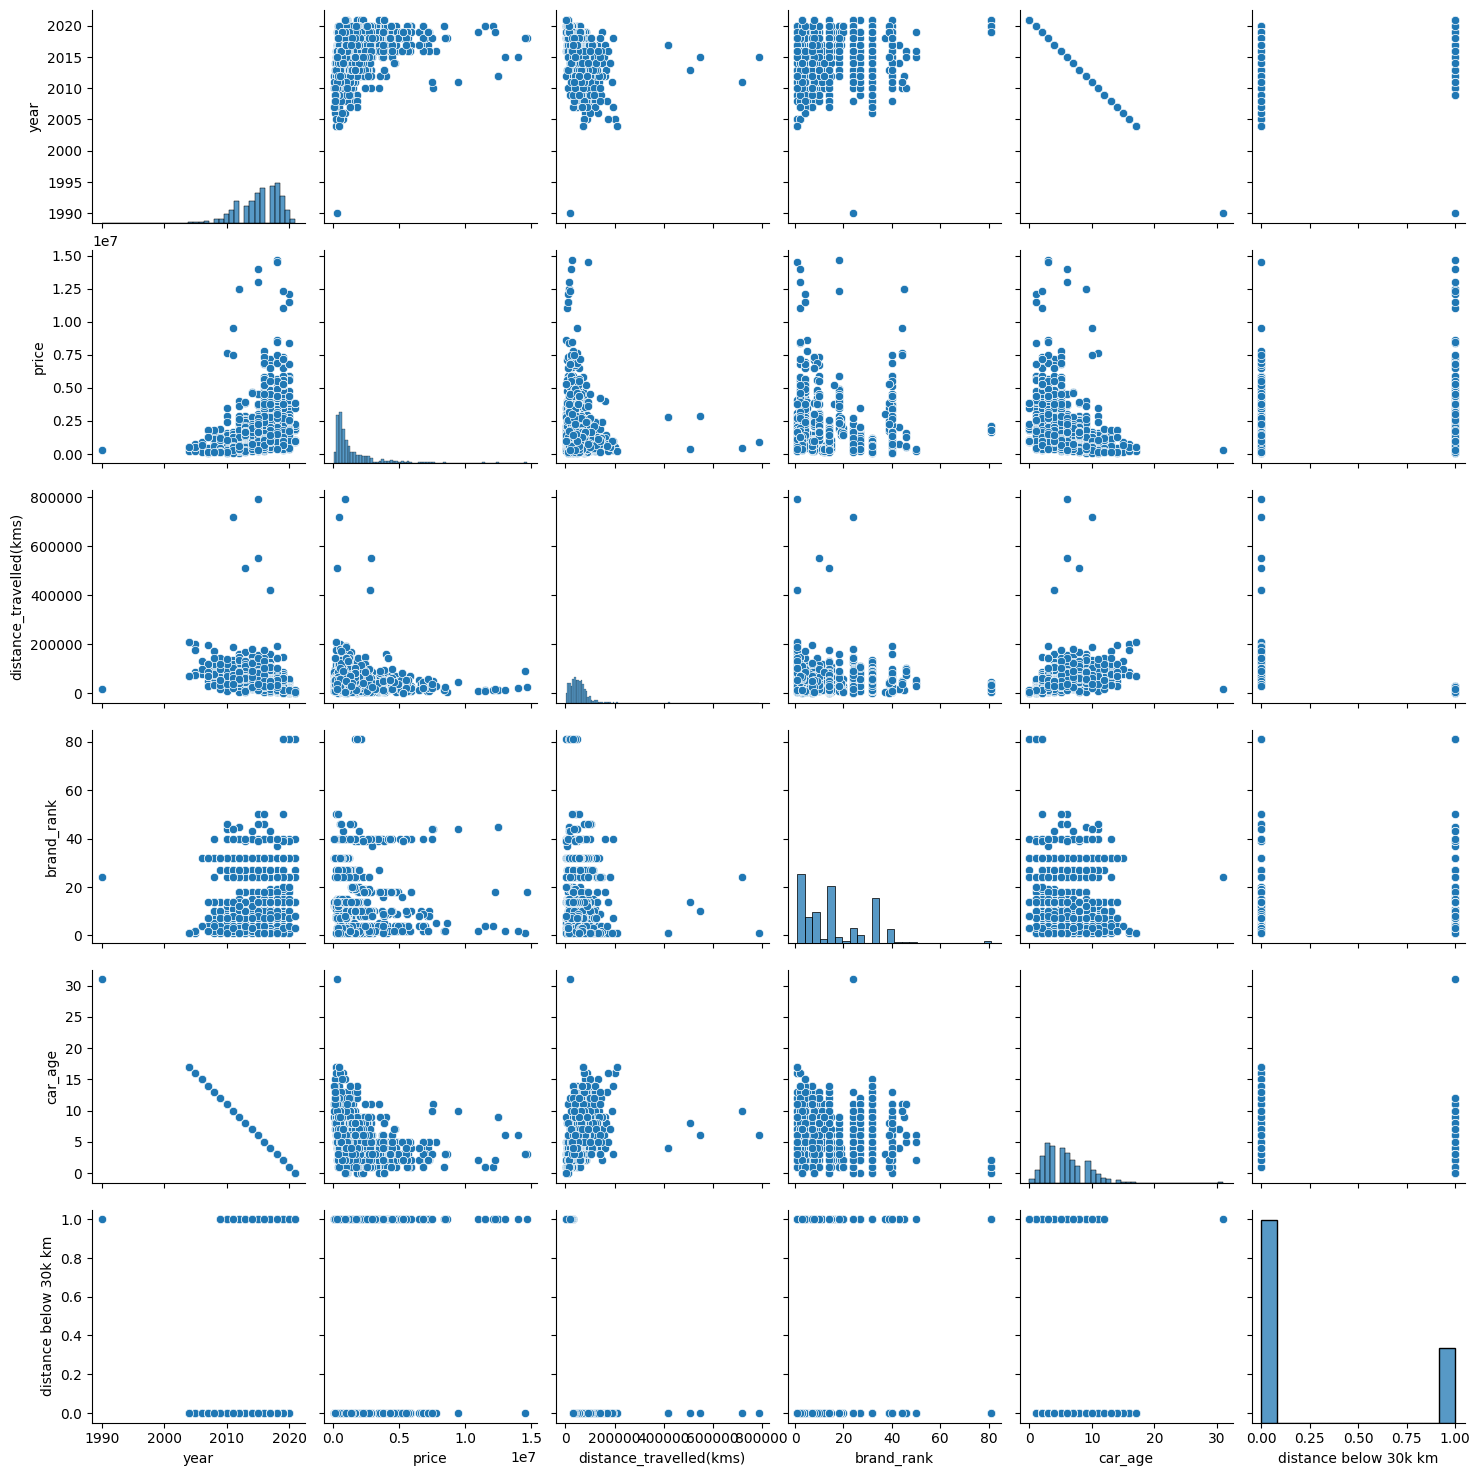

In [26]:
sns.pairplot(df)